<a href="https://colab.research.google.com/github/gusalvarez10/DiploDatos/blob/main/Practico_1_AyV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

## Descripción del problema

En una clínica hay tareas que son rutinarias y automatizables y otras que no. La gente que va a una clínica llega con distintos problemas a resolver, con distintos grados de urgencia.

Nosotres en mi equipo de la empresa [Kunan](https://www.kunan.com.ar/) pensamos una solución para las tareas de urgencia baja y que tienen gran potencial de automatización, con el espíritu de que eso libere la carga a personas de tener trabajos repetitivos, para que estas personas se puedan enfocar en los casos más urgentes o que necesiten expertise humano.

Un trabajo repetitivo que se presenta en un entorno clínica es el de atender a pedidos por

- **sacar un turno** para un médico de una especialidad, en una sede, en un horario.
- **consultar los turnos** vigentes que un paciente tiene.
- **cancelar un turno** vigente

Nosotres ofrecemos como producto un chatbot, o asistente conversacional, que usa Machine Learning para poder mantener una conversación y realizar acciones. Además de ocuparse de esas tres tareas principales, se le agregan
- poder pasar a hablar con un humano (lo que nosotres llamamos **handoff**)
- responder **preguntas frecuentes** (¿dónde queda la clínica? ¿qué horarios de atención tienen? ¿qué médicos hay?)

La funcionalidad de handoff es muy importante ya que una de las características innatas de los modelos de Machine Learning es que pueden fallar. Un fallo en un bot conversacional se ve como: no entender la **intención** detrás de una expresión del usuarie, no poder reconocer y extraer correctamente **entidades** (como lo son nombres de personas, dnis, teléfonos, especialidades médicas, etc), o perder el hilo de una conversación. Para que en estos casos la persona usuaria tenga una forma de suplir la necesidad que la llevó a hablar con el bot, ofrecemos una integración con un sistema de mensajería directo con operadores humanos.

En la mayoría de las clínicas la gente realiza estas acciones enlistadas hablando con une secretarie directamente, a través de Whatsapp, o usando una interfaz gráfica de la página web de la clínica. Pensar en términos de interfaces gráficas como la de un sitio web es algo con un poco más de tradición dentro del desarrollo de productos de software, sobre todo en comparación a las interfaces conversacionales. Whatsapp tiene, especialmente en latinomérica, gran adopción por parte de las personas, que están acostumbradas a usarlo como una interfaz conversacional para el acceso a múltiples servicios.

Un asistente conversacional ofrece una interfaz textual conversacional para la toma de acciones. En vez de apretar botones las personas van guiando a un chatbot a través de opciones en formularios. 

Este producto tiene ese desafío doble: ser un producto de NLP en español y ser un producto de Datos en la industria.

## Motivación

Cada persona al relacionarse con un producto de software trae consigo su universo de saberes, sus necesidades y sus costumbres, que decantarán en su percepción sobre qué cosas son "fáciles" de hacer con un software y qué cosas serán  "complicadas".

En las interfaces conversacionales se abre una puerta más de saberes y exigencias pre-existentes en las personas usuarias: la del lenguaje. Los lenguajes humanos están inscriptos a geografías, son maleables y dinámicos, [entre otras características](https://es.wikipedia.org/wiki/Lengua_natural) 


## Descripción del dataset

El dataset con el que trabajaremos este práctico consta de 21k filas. Corresponde a conversaciones reales de pacientes con el bot, con datos recolectados por el canal de comunicación de Whatsapp, con datos que corresponden desde diciembre de 2021 hasta marzo del 2022. Tiene mensajes de cada conversación, tanto emitidos por el bot como por el usuario y taggeados correspondientemente.

- **From_anon**: Número de teléfono emisor del mensaje. (Anonimizado)
- **To_anon**: Número de teléfono receptor del mensaje.(Anonimizado)
- **Hospital**: Nombre del hospital.
- **Tel_hospital**: Teléfono del hospital.
- **Body**: Cuerpo del mensaje.
- **Status**: Indica si el mensaje se recibió/leyó.
- **SentDate**: Año, mes, día, hora, minutos y segundos en el que se envió el mensaje.
- **Fecha**: Año, mes y día formato: aaaa-mm-dd
- **Dia**: día del mes
- **Hora**: hora del mensaje (hh)
- **Messages**: Siempre vale 1. Columna creada para utilizar agrupaciones.
- **Direction**: Dirección del mensaje ya sea de entrada (inbound) o salida (outbound-api).
A estas columnas se le agregan varias que que surgen de analizar mensajes del bot:
- **Appointment_msp**: Mensaje de turno confirmado con la especialidad solicitada.
- **Appointment**: valor dicotómico 1 indica que sacó turno y 0 que no.
- **Cancellation_msp**: Mensaje de turno cancelado que contiene la especialidad cancelada.
- **Cancelled**: valor dicotómico 1 indica que canceló efectivamente el turno y 0 que no se canceló.
- **Consult**: valor dicotómico 1 indica que se consultaron los turnos y 0 que no se consultaron
- **Consult_Appoint**: cuerpo del mensaje sobre la consulta realizada.
- **Fail_HH**: valor dicotómico donde 1 indica que no se solicitó HH y no se logró la comunicación.  
- **Got_HH**: valor dicotómico donde 1 indica que la persona solicitó y logró contactarse con HH.
- **No_correlation**:  valor dicotómico donde 1 indica que el bot detectó que la persona preguntó algo que no tenía que ver con las funcionalidades del bot.
- **not_DNI**: valor dicotómico donde 1 indica que el paciente proveyó un DNI que no estaba registrado como cliente de esa clínica
- **Error_Interno** : valor dicotómico donde 1 indica que hubo un error interno del bot
- **Error_501** : valor dicotómico donde 1 indica que hubo un error en los sistemas clínicos con los cuales el bot está integrado
- **Has_Cupo**: valor dicotómico donde 1 indica que el médico seleccionado no tiene cupo de turnos para una obra social.
- **Ask_Kunan**: valor dicotómico donde 1 indica que el bot menciona quien es kunan. Esto sirve para ver como funcionan los intent del bot.
- **Falla_Api_externo**:valor dicotómico donde 1 indica que se encontró un error de falla de api externo.
- **Many_Fallbacks_Goto_HH**: valor dicotómico donde 1 indica que el bot tuvo varios problemas de entendimiento y detectó la necesidad de pasar automáticamente a un humano.

### Cargando el dataset

In [451]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/kunan-sa/mentoria_2022/master/efm_anon.csv")
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

### Viendo un par de ejemplos

In [452]:
df.sample(3)

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
6414,Salud Consultorios,whatsapp:+5493515266230,Ya te encontrás registrado.,read,2022-02-16 14:24:19+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,3464,3254
11745,Carra,whatsapp:+5493515266217,Ya te encontrás registrado.,read,2022-03-01 19:06:54+00:00,2022-03-01,1,3,19,1,...,[],0,[],0,[],0,[],0,5047,6958
13943,CityBell,whatsapp:+5492215137770,*Escribe el número de la opción* que quieres e...,read,2022-02-28 23:34:40+00:00,2022-02-28,28,2,23,1,...,[],0,[],0,[],0,[],0,2624,3998


### Características del dataset

Cantidad de datos

In [453]:
len(df)

21000

Columnas

In [454]:
print(len(df.columns))
df.columns

41


Index(['Hospital', 'Tel_hospital', 'Body', 'Status', 'SentDate', 'Fecha',
       'Dia', 'Mes', 'Hora', 'Messages', 'Direction', 'Appointment_msp',
       'Appointment', 'Cancellation_msp', 'Cancelled', 'consult',
       'Consult_Appoint', 'fail_HH_sms', 'Fail_HH', 'achieve_HH', 'Got_HH',
       'Cupo', 'Full_turnos_obra_social', 'No_Relation', 'No_Correlation',
       'has_error', 'Error_Interno', 'has_error_501', 'Error_501',
       'falla_api_externo', 'Falla_Api_Externo', 'alta_dni', 'not_DNI',
       'issue_name', 'Issue_Name', 'ask_kunan', 'Ask_Kunan',
       'many_fallbacks_goto_hh', 'Many_Fallbacks_Goto_HH', 'From_anon',
       'To_anon'],
      dtype='object')

In [455]:
df.describe()

,Dia,Mes,Hora,Messages,Appointment,Cancelled,Consult_Appoint,Fail_HH,Got_HH,Full_turnos_obra_social,No_Correlation,Error_Interno,Error_501,Falla_Api_Externo,not_DNI,Issue_Name,Ask_Kunan,Many_Fallbacks_Goto_HH,From_anon,To_anon
count,21000.000000,21000.000000,21000.000000,21000.0,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,8.766905,2.339571,14.902476,1.0,0.012429,0.002762,0.002524,0.004286,0.005619,0.004429,0.001857,0.000571,0.002476,0.00019,0.008190,0.001524,0.000095,0.002381,2929.046571,2909.619524
std,7.413395,0.644018,3.342678,0.0,0.110791,0.052482,0.050175,0.065326,0.074751,0.066402,0.043056,0.023898,0.049701,0.01380,0.090132,0.039007,0.009759,0.048738,1638.239791,1658.363620
min,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,12.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1725.000000,1665.000000
50%,3.000000,2.000000,15.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2624.000000,2520.000000
75%,16.000000,3.000000,17.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3750.000000,3999.250000
max,28.000000,3.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,7478.000000,7182.000000


## Leyendo una conversación

Ordenando por From_anon y por SentDate se puede seguir el hilo de una conversación

In [456]:
# Conversaciones de una sola persona random.

df[(df["From_anon"]==4048) | (df["To_anon"]==4048)][['From_anon', 'To_anon', 'Direction', 'Body']]#.sort_values(by="SentDate")

,From_anon,To_anon,Direction,Body
6240,4048,3360,inbound,Buenas tardes necesito turno para Odontología
6268,4048,3360,inbound,Si
6270,4048,3360,inbound,XXXXXXXXXXXXX
6273,4048,3360,inbound,XXXXXXXX
6275,4048,3360,inbound,Odontólogo
6277,4048,3360,inbound,0
6279,4048,3360,inbound,Hola buenas tardes necesito turno para la odon...
6283,4048,3360,inbound,Odontología
6306,4048,3360,inbound,Si
6310,4048,3360,inbound,XXXXXXXXXXXXX


### Obteniendo datos de enero

In [457]:
enero = df[df["Mes"] == 1]

print(len(enero))

enero.sample(3)

2000


,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
1268,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXXXXXXX,received,2022-01-03 15:53:03+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,2566,2122
1072,Carra,whatsapp:+5493515266217,XXXXXXXX,received,2022-01-03 16:35:26+00:00,2022-01-03,3,1,16,1,...,[],0,[],0,[],0,[],0,2886,2121
1200,Salud Consultorios,whatsapp:+5493515266230,Necesito tu email para transferirte a un opera...,read,2022-01-03 16:01:15+00:00,2022-01-03,3,1,16,1,...,[],0,[],0,[],0,[],0,2250,2267


### Datos de enero que son de pacientes

In [458]:
enero_inbound = enero[enero["Direction"]=="inbound"]

print(len(enero_inbound))

enero_inbound.sample(4)

829


,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
919,CityBell,whatsapp:+5492215137770,XXXXXXXXXXXXX,received,2022-01-03 17:11:07+00:00,2022-01-03,3,1,17,1,...,[],0,[],0,[],0,[],0,1896,1072
394,Carra,whatsapp:+5493515266217,XXXXXXXXXXXXX,received,2022-01-03 18:55:01+00:00,2022-01-03,3,1,18,1,...,[],0,[],0,[],0,[],0,2883,2121
1215,Carra,whatsapp:+5493515266217,XXXXXXXX,received,2022-01-03 15:58:33+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,3057,2121
1250,Salud Consultorios,whatsapp:+5493515266230,4,received,2022-01-03 15:54:32+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,2566,2122


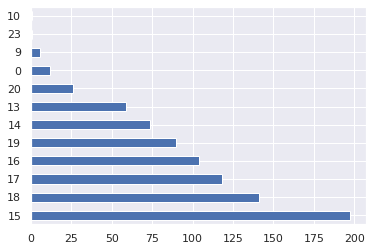

In [459]:
enero_inbound["Hora"].value_counts().plot(kind='barh')

# Ejercicios propuestos

## Ejercicio 1: Descripción del dataset
- Describa el dataset con sus propias palabras.  ¿Cuáles son los tipos de datos que hay en el dataset? ¿Hay columnas derivadas de otras? ¿Encuentra dificultades a priori para entender alguna de las columnas del dataset? Qué tipos de datos hay en el dataset? 
- ¿Cuántos y cuáles son los hospitales que se encuentran en el dataset? ¿Están los mismos hospitales a lo largo del tiempo? 

Argumente sus respuestas con ejemplos concretos y gráficos en lo posible.

####Describa el dataset con sus propias palabras. 

##### Sobre las columnas
A partir de la descripción sobre las columnas provista en la introducción podemos clasificar las columnas del dataset en 

* Metadatos sobre el mensaje: `from_anon` y `to_anon` indican los teléfonos involucrados en la conversación, mientras que `direction` informa el sentido del mensaje (entrante / saliente). `status` brinda información sobre si el mensaje ha sido leido.

* Datos temporales. La columna `SentDate` contiene la información temporal del mensaje, mientras que las columnas `Fecha`, `Dia`, `Mes`, `Hora` son columnas derivadas

* Información sobre la interacción: ¿Se consultaron turnos? ¿Se asignó un turno? ¿Se canceló el turno asignado?

* Información sobre la plataforma: Las columnas `Falla_Api_externo`, `Error_Interno` y `Error_501` nos permiten analizar ciertos atributos cualitativos sobre el funcionamiento del bot.

* Información sobre el bot: Podemos analizar la performance del bot (refiriendonos al porcentaje de casos en que se resuelve la interacción sin pasar a un humano) mediante las columnas `No_Correlation`, `Ask_kunan`  y `Many_Fallbacks_Goto_HH` 

####¿Cuáles son los tipos de datos que hay en el dataset?

In [460]:
#Primero se importan las librerias a utilizar.
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sb

In [461]:
df.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

Los tipos de datos presentes en el dataset son int64 y object.

####¿Hay columnas derivadas de otras?

Si, se encuentran varias columnas derivadas de otras, tales como:

* Appointment_msp - Appointment

* Cancellation_msp - Cancelled

* consult - Consult_Appoint

* fail_HH_sms - Fail_HH

* achieve_HH - Got_HH

* Cupo - Full_turnos_obra_social

* has_error - Error_Interno

* has_error_501 - Error_501

* falla_api_externo - Falla_Api_Externo

* alta_dni - not_DNI

* issue_name - Issue_Name

* ask_kunan - Ask_Kunan

* many_fallbacks_goto_hh - Many_Fallbacks_Goto_HH

Ambas columnas de cada fila representan lo mismo, solo que una es de tipo object y la otra de tipo int64.
Por una cuestion de practicidad en la manipulacion de datos.

In [462]:
df.Messages.unique()

array([1])

####¿Encuentra dificultades a priori para entender alguna de las columnas del dataset?

In [463]:
#Muestro las columnas del dataset.
df.columns

Index(['Hospital', 'Tel_hospital', 'Body', 'Status', 'SentDate', 'Fecha',
       'Dia', 'Mes', 'Hora', 'Messages', 'Direction', 'Appointment_msp',
       'Appointment', 'Cancellation_msp', 'Cancelled', 'consult',
       'Consult_Appoint', 'fail_HH_sms', 'Fail_HH', 'achieve_HH', 'Got_HH',
       'Cupo', 'Full_turnos_obra_social', 'No_Relation', 'No_Correlation',
       'has_error', 'Error_Interno', 'has_error_501', 'Error_501',
       'falla_api_externo', 'Falla_Api_Externo', 'alta_dni', 'not_DNI',
       'issue_name', 'Issue_Name', 'ask_kunan', 'Ask_Kunan',
       'many_fallbacks_goto_hh', 'Many_Fallbacks_Goto_HH', 'From_anon',
       'To_anon'],
      dtype='object')

A priori se encuentran dificultades en entender columnas relacionadas a errores, ya que los nombres de los errores no son intuitivos, pero luego de inspeccionar las columnas se llega al entendimiento de cada una.

####¿Cuántos y cuáles son los hospitales que se encuentran en el dataset? 

In [464]:
df['Hospital'].value_counts()

CityBell              9922
Carra                 5860
Salud Consultorios    3320
Los Cedros            1859
Santa Fe                37
Desarrollo               2
Name: Hospital, dtype: int64

Como se puede observar se tienen 5 hospitales y son los detallados en la parte superior de esta celda.

Una manera mas grafica de visualizar esta categoria es mediante un grafico countplot como se muestra a continuacion.

Text(0.5, 1.0, 'Hospitales')

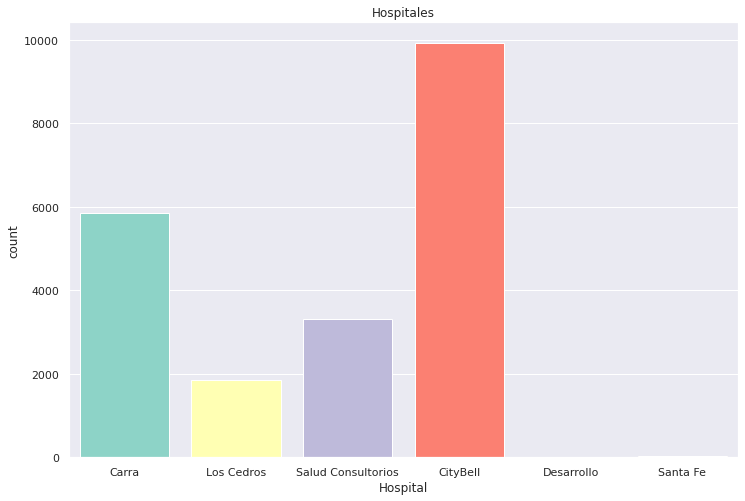

In [465]:
fig = plt.figure(figsize=(12,8))

sb.set_theme(style="darkgrid")

sb.countplot(x=df.Hospital,palette="Set3",saturation=1)

plt.title('Hospitales')

####Agregados

In [466]:
#Consultas sin cupos por hospital.
df['Cupo'].value_counts()
df[ df['Cupo'] != '[]'].Hospital.value_counts()

CityBell      45
Carra         31
Los Cedros    17
Name: Hospital, dtype: int64

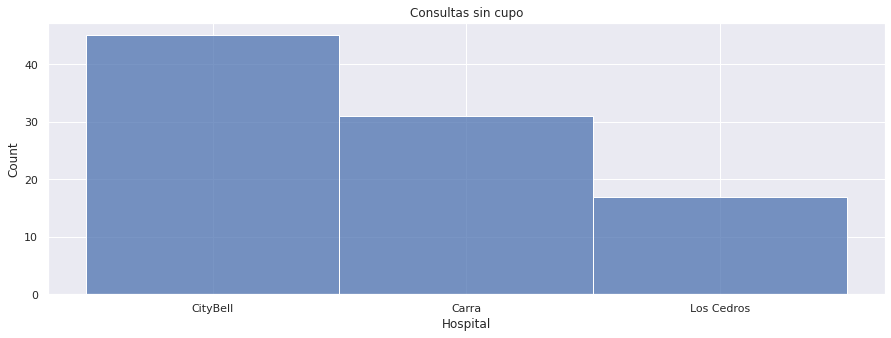

In [467]:
#Grafico de consultas sin cupos por hospital.

fig = plt.figure(figsize=(15, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Consultas sin cupo')

sin_cupo = df[ df['Cupo'] != '[]']
sb.histplot(data=sin_cupo, x='Hospital')

####¿Están los mismos hospitales a lo largo del tiempo?

In [468]:
"""
Para poder hacer un analisis de la variacion de los hospitales a lo largo del
tiempo, primero visualizo de una mejor manera la columna SentDate.
"""

df.SentDate = pd.to_datetime(df.SentDate)
df.SentDate.dt.strftime('%Y-%m').unique()

array(['2022-01', '2022-02', '2022-03'], dtype=object)

Se confirma que se tienen datos que van desde enero a marzo de 2022 y se elige tomar mes como la variable de tiempo a tener en cuenta.

In [469]:
#Se obtienen los hospitales agrupados por mes.
for i in [1,2,3]:
  df_hospitales_por_mes = df.Hospital[df.Mes==i].groupby(df.Mes).value_counts()
  print(df_hospitales_por_mes.to_string(index=True))
  print('\n')

Mes  Hospital          
1    Carra                 1255
     Salud Consultorios     543
     Los Cedros             180
     CityBell                22


Mes  Hospital          
2    CityBell              5159
     Carra                 2294
     Salud Consultorios    1602
     Los Cedros             785
     Santa Fe                27
     Desarrollo               2


Mes  Hospital          
3    CityBell              4741
     Carra                 2311
     Salud Consultorios    1175
     Los Cedros             894
     Santa Fe                10




Como se puede observar en el resultado se tiene que la mayoria de hospitales se mantiene a lo largo de los 3 meses, con las particularidades que el hospital Desarrollo solo en el mes de Febrero y el Santa Fe en los meses de Febrero y Marzo.





####Agregados

In [470]:
#fig, ax = plt.subplots(2,figsize=(15, 5))
#plt.ticklabel_format(style='plain', axis='x')

#for mes in range(1, 3):
#  seaborn.histplot(data = df[df["Mes"] == mes], x='Hospital', ax = ax[mes - 1])

#Cantidad de mmensajes por hospital diferenciado por mes.
df_hospital_por_mes = df.groupby(['Hospital', 'Mes'])['Messages'].count()
df_hospital_por_mes

Hospital            Mes
Carra               1      1255
                    2      2294
                    3      2311
CityBell            1        22
                    2      5159
                    3      4741
Desarrollo          2         2
Los Cedros          1       180
                    2       785
                    3       894
Salud Consultorios  1       543
                    2      1602
                    3      1175
Santa Fe            2        27
                    3        10
Name: Messages, dtype: int64

In [471]:
#seaborn.lineplot(data = df_hospital_por_mes, x='Mes', y = 'Messages', hue='Hospital')

In [472]:
# Efectividad del bot
len(df[df['No_Correlation'] == 0]) / len(df)

0.9981428571428571

In [473]:
#Cantidad de mensajes por direcciones:
df.Direction.value_counts()

outbound-api    12346
inbound          8654
Name: Direction, dtype: int64

In [474]:
#Cantidad de mensajes de pacientes
inbound = df.Direction == 'inbound'
msg_pacientes = df[inbound]
msg_bot = df[~inbound]

#Cantidad promedio de mensaje de bot por paciente
len(msg_bot) / len(msg_pacientes)

1.4266235266928589

In [475]:
#Muestra de 50 mensajes de pacientes.
msg_pacientes.sample(50)

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
7858,Carra,whatsapp:+5493515266217,XXX,received,2022-02-16 12:18:21+00:00,2022-02-16,16,2,12,1,...,[],0,[],0,[],0,[],0,4807,3359
15416,Carra,whatsapp:+5493515266217,XXXXXXXXX,received,2022-03-02 19:20:00+00:00,2022-03-02,2,3,19,1,...,[],0,[],0,[],0,[],0,6584,4855
14920,CityBell,whatsapp:+5492215137770,5.0,received,2022-03-02 19:47:50+00:00,2022-03-02,2,3,19,1,...,[],0,[],0,[],0,[],0,2780,2519
12608,CityBell,whatsapp:+5492215137770,Cancelar turno,received,2022-03-01 14:14:30+00:00,2022-03-01,1,3,14,1,...,[],0,[],0,[],0,[],0,3054,2519
10927,CityBell,whatsapp:+5492215137770,XXXXXXXXXXXXX,received,2022-02-16 09:49:51+00:00,2022-02-16,16,2,9,1,...,[],0,[],0,[],0,[],0,3052,1665
2112,CityBell,whatsapp:+5492215137770,XXXXXXXX,received,2022-02-16 19:40:47+00:00,2022-02-16,16,2,19,1,...,[],0,[],0,[],0,[],0,1153,1665
15609,Carra,whatsapp:+5493515266217,Hola,received,2022-03-02 19:10:20+00:00,2022-03-02,2,3,19,1,...,[],0,[],0,[],0,[],0,7272,4855
3224,CityBell,whatsapp:+5492215137770,XXXXXXXX,received,2022-02-16 17:33:47+00:00,2022-02-16,16,2,17,1,...,[],0,[],0,[],0,[],0,2440,1665
3464,Carra,whatsapp:+5493515266217,Si,received,2022-02-16 17:23:26+00:00,2022-02-16,16,2,17,1,...,[],0,[],0,[],0,[],0,4439,3359
1237,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXX,received,2022-01-03 15:55:33+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,2402,2122


##### Campos con errores

In [476]:
len(df[(df['Error_Interno'] == 1) | (df ['Error_501'] == 1 )| (df ['Falla_Api_Externo'] == 1)])

68

In [477]:
len(df[(df['Error_Interno'] == 1) | (df ['Error_501'] == 1 )| (df ['Falla_Api_Externo'] == 1)])

68

## Ejercicio 2: Exploración
- Explorando el dataset, puede reconocer a priori "clases/categorías de datos"? Por dar un ejemplo: mensajes del bot y mensajes de clientes. Por dar otro ejemplo: Mensajes durante la mañana y mensajes durante la tarde. Intente reconocer al menos tres categorías y a partir de estas responder para cada una: ¿está representada esta categoría de forma balanceada en el dataset? Para argumentar su respuesta realice un gráfico que muestre la distribución de esta clase. ¿Qué hipótesis puede generar a partir de estas observaciones? ¿Qué consecuencias a nivel investigación puede tener si esta clase reconocida tiene esa distribución en el dataset?    

In [478]:
df.columns
#df.Appointment_msp.value_counts()
#df.Cancellation_msp.value_counts()
df.groupby(['From_anon', 'To_anon'])

df.From_anon.value_counts()
df.To_anon.value_counts() == 1


2519    False
1665    False
4855    False
3359    False
3360    False
        ...  
3783     True
2044     True
1834     True
5397     True
3527     True
Name: To_anon, Length: 779, dtype: bool

In [479]:
#Cantidad de mensajes agrupado por numero de telefono.
msg_pacientes.groupby('From_anon')['Messages'].sum()

From_anon
2        9
12       4
17       9
18      15
32      15
        ..
7363     7
7404    15
7421     7
7447     8
7478     5
Name: Messages, Length: 766, dtype: int64

In [480]:
#Columnas del dataframe.
df.columns

Index(['Hospital', 'Tel_hospital', 'Body', 'Status', 'SentDate', 'Fecha',
       'Dia', 'Mes', 'Hora', 'Messages', 'Direction', 'Appointment_msp',
       'Appointment', 'Cancellation_msp', 'Cancelled', 'consult',
       'Consult_Appoint', 'fail_HH_sms', 'Fail_HH', 'achieve_HH', 'Got_HH',
       'Cupo', 'Full_turnos_obra_social', 'No_Relation', 'No_Correlation',
       'has_error', 'Error_Interno', 'has_error_501', 'Error_501',
       'falla_api_externo', 'Falla_Api_Externo', 'alta_dni', 'not_DNI',
       'issue_name', 'Issue_Name', 'ask_kunan', 'Ask_Kunan',
       'many_fallbacks_goto_hh', 'Many_Fallbacks_Goto_HH', 'From_anon',
       'To_anon'],
      dtype='object')

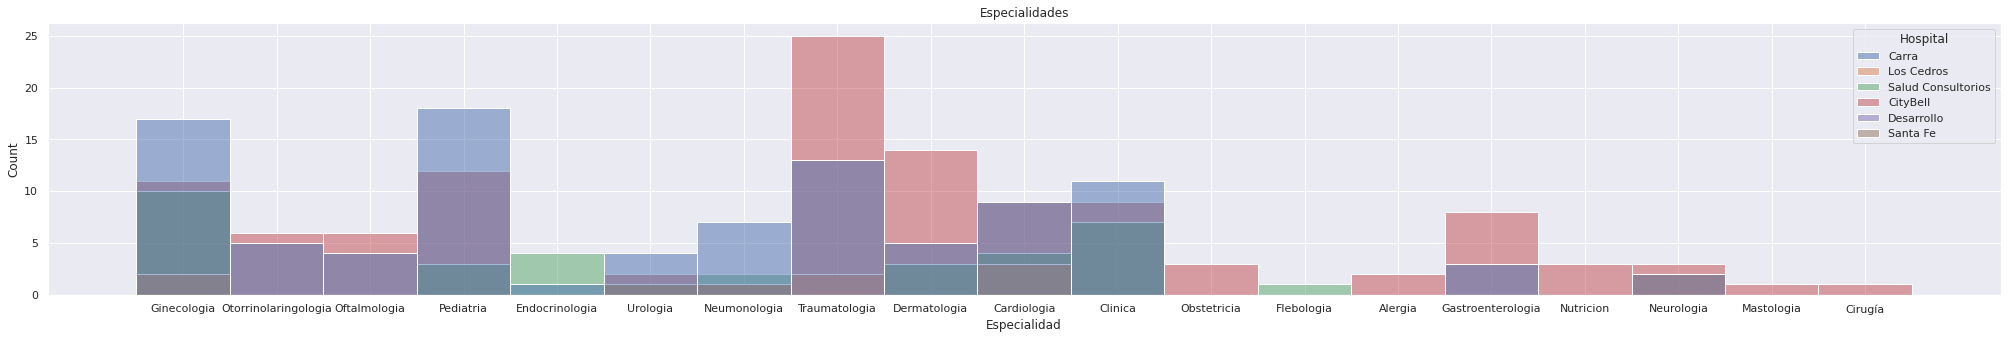

In [481]:
## Especialidades

df['Especialidad'] = df [df.Appointment == 1].Body.apply(lambda s : s.split(' ')[4].title())

fig = plt.figure(figsize=(35, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Especialidades')

sb.histplot(data=df, x = 'Especialidad', hue='Hospital')

## Ejercicio 3: Generación




#### Calcular la cantidad de mensajes promedio que implicó sacar un turno por mes, por hospital. Realice un gráfico con los resultados de estas cantidades. Interprete los resultados intentando esbozar hipótesis en el uso del bot. Si encuentra resultados destacados/anómalos sírvase de buscar en internet información sobre los hospitales para poder fortalecer su argumento.


Dataframe nuevo creado para calcular la cantidad de mensajes promedio por por turno tanto para hospital como para mes.

In [615]:
df_cantidad_mensajes = pd.DataFrame()

for l in df.Hospital.unique():
  print('\n')
  print('Hospital ' + l + ':')
  print('\n')

  for k in [1,2,3]:

    #Lista de turnos con valores From_anon y To_anon.
    df_nw = df[(df.Appointment  == 1) & (df.Mes == k) & (df.Hospital == l)][['From_anon','To_anon']].values.tolist()

    #Se define la variable total.
    total =0

    #Cantidad total de mensajes del bot que implicó sacar un turno en los 3 meses.
    for i,j in df_nw:
      total = total + (df[(df.From_anon == i) & (df.To_anon == j) &(df.Mes ==k) & (df.Hospital == l)].Hospital.count())
 
    if k==1:
      if len(df_nw) == 0:
        print('En el mes de enero el bot envió ' + str(df.Hospital[(df.Hospital ==l) & (df.Mes == k)].count()) + ' mensajes y no se encontraron turnos.')
        df_cantidad_mensajes = df_cantidad_mensajes.append({'Hospital': l, 'Cantidad_Mensajes': str(df.Hospital[(df.Hospital ==l) & (df.Mes == k)].count()), 'Cantidad_turnos':0, 'Mes':k, 'Cantidad_msj_promedio_turno':0}, ignore_index=True)
      else:
        print("En el mes de enero el bot envió " + str(df.Hospital[(df.Hospital ==l) & (df.Mes == k)].count()) + " mensajes y se sacaron " + str(len(df_nw)) + ' turnos, con un promedio de ' + str(round(total / len(df_nw))) + ' mensajes por turno.')
        df_cantidad_mensajes = df_cantidad_mensajes.append({'Hospital': l, 'Cantidad_Mensajes': str(total), 'Cantidad_turnos':str(len(df_nw)), 'Mes':k,'Cantidad_msj_promedio_turno': str(round(total / len(df_nw)))}, ignore_index=True)
    if k==2:
      if len(df_nw) == 0:
        print('En el mes de febrero el bot envió ' + str(df.Hospital[(df.Hospital ==l) & (df.Mes == k)].count()) + ' mensajes y no se encontraron turnos.')
        df_cantidad_mensajes = df_cantidad_mensajes.append({'Hospital': l, 'Cantidad_Mensajes': str(df.Hospital[(df.Hospital ==l) & (df.Mes == k)].count()), 'Cantidad_turnos':0, 'Mes':k,'Cantidad_msj_promedio_turno':0}, ignore_index=True)
      else:
        print("En el mes de febrero el bot envió " + str(df.Hospital[(df.Hospital ==l) & (df.Mes == k)].count()) + " mensajes y se sacaron " + str(len(df_nw)) + ' turnos, con un promedio de ' + str(round(total / len(df_nw))) + ' mensajes por turno.')
        df_cantidad_mensajes = df_cantidad_mensajes.append({'Hospital': l, 'Cantidad_Mensajes': str(total), 'Cantidad_turnos':str(len(df_nw)), 'Mes':k,'Cantidad_msj_promedio_turno': str(round(total / len(df_nw)))}, ignore_index=True)
    if k==3:
      if len(df_nw)== 0:
        print('En el mes de marzo el bot envió ' + str(df.Hospital[(df.Hospital ==l) & (df.Mes == k)].count()) + ' mensajes y no se encontraron turnos.')
        df_cantidad_mensajes = df_cantidad_mensajes.append({'Hospital': l, 'Cantidad_Mensajes': str(df.Hospital[(df.Hospital ==l) & (df.Mes == k)].count()), 'Cantidad_turnos':0, 'Mes':k,'Cantidad_msj_promedio_turno':0}, ignore_index=True)
      else:
        print("En el mes de marzo el bot envió " + str(df.Hospital[(df.Hospital ==l) & (df.Mes == k)].count()) + " mensajes y se sacaron " + str(len(df_nw)) + ' turnos, con un promedio de ' + str(round(total / len(df_nw))) + ' mensajes por turno.')
        df_cantidad_mensajes = df_cantidad_mensajes.append({'Hospital': l, 'Cantidad_Mensajes': str(total), 'Cantidad_turnos':str(len(df_nw)), 'Mes':k,'Cantidad_msj_promedio_turno': str(round(total / len(df_nw)))}, ignore_index=True)

df_cantidad_mensajes['Cantidad_Mensajes']= pd.to_numeric(df_cantidad_mensajes['Cantidad_Mensajes'])
df_cantidad_mensajes['Cantidad_turnos']= pd.to_numeric(df_cantidad_mensajes['Cantidad_turnos'])
df_cantidad_mensajes['Mes']= pd.to_numeric(df_cantidad_mensajes['Mes'])
df_cantidad_mensajes['Cantidad_msj_promedio_turno']= pd.to_numeric(df_cantidad_mensajes['Cantidad_msj_promedio_turno'])
print("\n")
df_cantidad_mensajes        



Hospital Carra:


En el mes de enero el bot envió 1255 mensajes y se sacaron 21 turnos, con un promedio de 23 mensajes por turno.
En el mes de febrero el bot envió 2294 mensajes y se sacaron 41 turnos, con un promedio de 23 mensajes por turno.
En el mes de marzo el bot envió 2311 mensajes y se sacaron 37 turnos, con un promedio de 30 mensajes por turno.


Hospital Los Cedros:


En el mes de enero el bot envió 180 mensajes y no se encontraron turnos.
En el mes de febrero el bot envió 785 mensajes y se sacaron 8 turnos, con un promedio de 28 mensajes por turno.
En el mes de marzo el bot envió 894 mensajes y se sacaron 3 turnos, con un promedio de 68 mensajes por turno.


Hospital Salud Consultorios:


En el mes de enero el bot envió 543 mensajes y se sacaron 6 turnos, con un promedio de 26 mensajes por turno.
En el mes de febrero el bot envió 1602 mensajes y se sacaron 18 turnos, con un promedio de 45 mensajes por turno.
En el mes de marzo el bot envió 1175 mensajes y se sacaron 11 tur

,Hospital,Cantidad_Mensajes,Cantidad_turnos,Mes,Cantidad_msj_promedio_turno
0,Carra,474,21,1.0,23
1,Carra,961,41,2.0,23
2,Carra,1128,37,3.0,30
3,Los Cedros,180,0,1.0,0
4,Los Cedros,221,8,2.0,28
5,Los Cedros,203,3,3.0,68
6,Salud Consultorios,155,6,1.0,26
7,Salud Consultorios,807,18,2.0,45
8,Salud Consultorios,215,11,3.0,20
9,CityBell,22,0,1.0,0


Cantidad de mensajes enviados por el bot en el que se confirmo un turno.

In [616]:
df_cantidad_mensajes['Cantidad_Mensajes'].sum()

7887

Cantidad de turnos de todo el dataset.

In [617]:
df_cantidad_mensajes['Cantidad_turnos'].sum()

261

Cantidad de mensajes promedio para sacar un turno por hospital (bot)

In [589]:
df_cantidad_mensajes['Cantidad_msj_promedio_turno'].groupby(df_cantidad_mensajes['Hospital']).sum()

Hospital
Carra                 76
CityBell              61
Desarrollo             0
Los Cedros            96
Salud Consultorios    91
Santa Fe               0
Name: Cantidad_msj_promedio_turno, dtype: int64

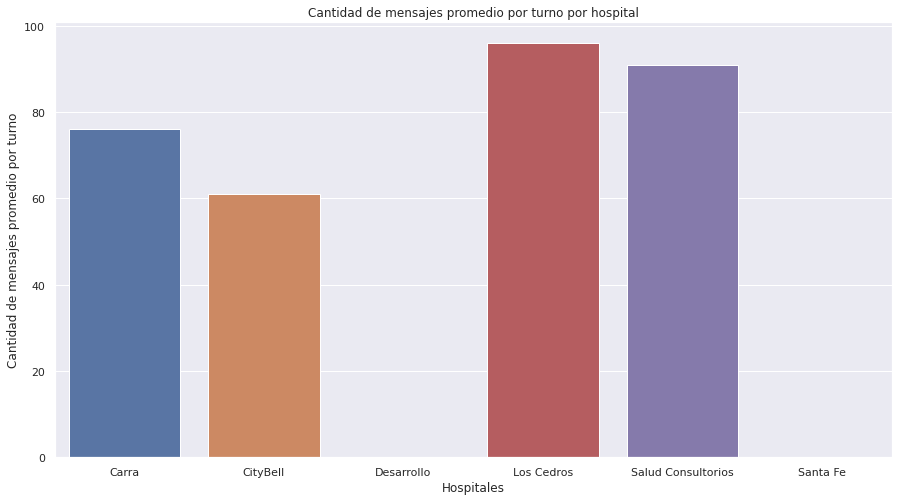

In [610]:
plt.figure(figsize=(15,8))

Hospitales = sorted(set(df_cantidad_mensajes['Hospital'].unique().tolist()))
Cantidad_de_mensajes = df_cantidad_mensajes['Cantidad_msj_promedio_turno'].groupby(df_cantidad_mensajes['Hospital']).sum().values.tolist()


plt.xlabel('Hospitales')
plt.ylabel('Cantidad de mensajes promedio por turno')
plt.title("Cantidad de mensajes promedio por turno por hospital")

sb.set_theme(style="darkgrid")
sb.barplot(x=Hospitales, y=Cantidad_de_mensajes)

plt.show()

Cantidad de mensajes promedio para sacar un turno por mes (bot)

In [588]:
df_cantidad_mensajes['Cantidad_msj_promedio_turno'].groupby(df_cantidad_mensajes['Mes']).sum()

Mes
1.0     49
2.0    123
3.0    152
Name: Cantidad_msj_promedio_turno, dtype: int64

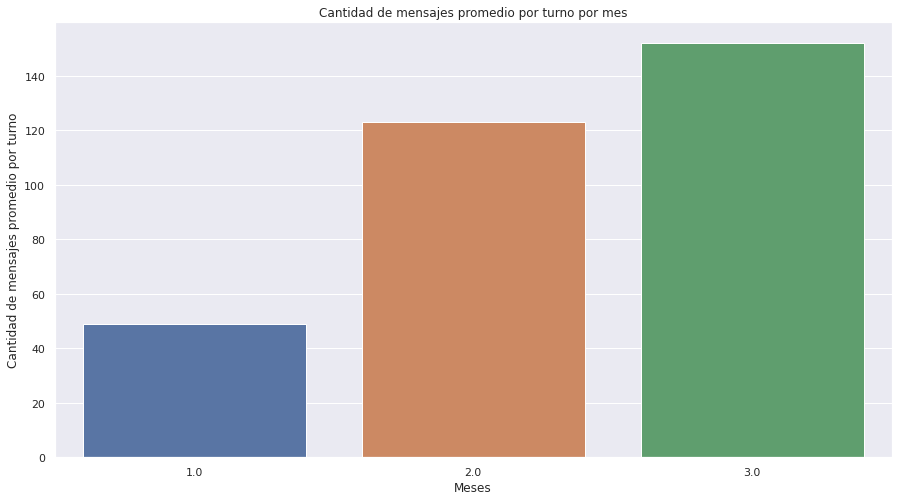

In [611]:
plt.figure(figsize=(15,8))

Meses = sorted(set(df_cantidad_mensajes['Mes'].unique().tolist()))
Cantidad_de_mensajes_1 = df_cantidad_mensajes['Cantidad_msj_promedio_turno'].groupby(df_cantidad_mensajes['Mes']).sum().values.tolist()


plt.xlabel('Meses')
plt.ylabel('Cantidad de mensajes promedio por turno')
plt.title("Cantidad de mensajes promedio por turno por mes")

sb.set_theme(style="darkgrid")
sb.barplot(x=Meses, y=Cantidad_de_mensajes_1)

plt.show()

### Cantidad de mensajes promedio para sacar un turno

Para calcular el número promedio de mensajes que implicó sacar un turno consideramos que
* Todos los mensajes tienen un campo 'Appointment' que indica si se obtuvo un turno o no

In [591]:
# ¿Cómo sabemos en que momento se sacó un turno? Con la columna Appointment.
# Parece haber solo 261 turnos

df.Appointment.dropna().value_counts()

0    20739
1      261
Name: Appointment, dtype: int64

In [592]:
#vemos los mensajes que tienen Appointment == 1. Estos son los que consideramos como marcadores para indicar que se entregó un turno

confirmed = df [df.Appointment == 1]
confirmed.sample(20)

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon,Especialidad
1846,Carra,whatsapp:+5493515266217,tu turno de Traumatologia ha sido confirmado ...,read,2022-01-03 14:00:36+00:00,2022-01-03,3,1,14,1,...,0,[],0,[],0,[],0,2249,3098,Traumatologia
15265,Salud Consultorios,whatsapp:+5493515266230,tu turno de PEDIATRIA ha sido confirmado para...,read,2022-03-02 19:27:19+00:00,2022-03-02,2,3,19,1,...,0,[],0,[],0,[],0,5048,5148,Pediatria
9641,Carra,whatsapp:+5493515266217,tu turno de DERMATOLOGIA ha sido confirmado p...,read,2022-02-16 10:47:44+00:00,2022-02-16,16,2,10,1,...,0,[],0,[],0,[],0,3463,4146,Dermatologia
17468,Carra,whatsapp:+5493515266217,tu turno de OTORRINOLARINGOLOGIA ha sido conf...,read,2022-03-02 17:11:29+00:00,2022-03-02,2,3,17,1,...,0,[],0,[],0,[],0,5047,6360,Otorrinolaringologia
13633,Carra,whatsapp:+5493515266217,tu turno de PEDIATRIA ha sido confirmado para...,read,2022-03-01 09:49:29+00:00,2022-03-01,1,3,9,1,...,0,[],0,[],0,[],0,5047,6300,Pediatria
2849,CityBell,whatsapp:+5492215137770,tu turno de GINECOLOGIA ha sido confirmado pa...,delivered,2022-02-16 17:53:22+00:00,2022-02-16,16,2,17,1,...,0,[],0,[],0,[],0,1725,2171,Ginecologia
10358,CityBell,whatsapp:+5492215137770,tu turno de CLINICA MEDICA ha sido confirmado...,delivered,2022-02-16 10:11:46+00:00,2022-02-16,16,2,10,1,...,0,[],0,[],0,[],0,1725,2537,Clinica
404,Carra,whatsapp:+5493515266217,tu turno de Neumonologia ha sido confirmado p...,read,2022-01-03 18:54:17+00:00,2022-01-03,3,1,18,1,...,0,[],0,[],0,[],0,2249,2700,Neumonologia
7886,Salud Consultorios,whatsapp:+5493515266230,tu turno de GINECOLOGIA ha sido confirmado pa...,read,2022-02-16 12:08:13+00:00,2022-02-16,16,2,12,1,...,0,[],0,[],0,[],0,3464,3561,Ginecologia
2074,Carra,whatsapp:+5493515266217,tu turno de OTORRINOLARINGOLOGIA ha sido conf...,read,2022-02-16 19:49:52+00:00,2022-02-16,16,2,19,1,...,0,[],0,[],0,[],0,3463,3218,Otorrinolaringologia


In [593]:
#
df[df.Appointment == 1 ][['To_anon', 'From_anon', 'Direction', 'Hospital']]

,To_anon,From_anon,Direction,Hospital
1,3146,2249,outbound-api,Carra
51,3469,2249,outbound-api,Carra
87,3358,2249,outbound-api,Carra
256,3554,2249,outbound-api,Carra
291,3253,2249,outbound-api,Carra
...,...,...,...,...
20035,2494,2624,outbound-api,CityBell
20070,1562,2624,outbound-api,CityBell
20486,6874,5047,outbound-api,Carra
20760,1894,2624,outbound-api,CityBell


In [594]:
df[(df.To_anon == 3146) & (df.From_anon == 2249) ][['Body', 'SentDate', 'Appointment']]

#df[df.From_anon == 3146]

,Body,SentDate,Appointment
0,"Hola, soy el asistente virtual de Clinica Carr...",2022-01-02 20:42:13+00:00,0
1,tu turno de Ginecologia ha sido confirmado pa...,2022-01-02 20:42:13+00:00,1
3,¡Muchas gracias! Tus datos son: \n Sede: Carr...,2022-01-02 20:42:02+00:00,0
5,*Escribe el número de la opción* que quieres e...,2022-01-02 20:41:46+00:00,0
7,*Escribe el número de la opción* que quieres e...,2022-01-02 20:41:38+00:00,0
9,*Escribe el número de la opción* que quieres e...,2022-01-02 20:41:19+00:00,0
11,*Escribe el número de la opción* que quieres e...,2022-01-02 20:41:12+00:00,0
13,*Escribe el número de la opción* que quieres e...,2022-01-02 20:41:02+00:00,0
14,Quedaron guardados tus datos.,2022-01-02 20:41:02+00:00,0
16,¡Muchas gracias! Tus datos son: \n XXXXXXXXX...,2022-01-02 20:40:58+00:00,0


In [595]:
df[(df.From_anon == 4788) & (df.To_anon == 4613)]

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon,Especialidad
13526,Santa Fe,whatsapp:+5493424134455,¿Te puedo ayudar con algo más?,read,2022-03-01 10:02:05+00:00,2022-03-01,1,3,10,1,...,0,[],0,[],0,[],0,4788,4613,NaN
13527,Santa Fe,whatsapp:+5493424134455,No se encuentra registrado ese DNI en el sistema.,read,2022-03-01 10:02:05+00:00,2022-03-01,1,3,10,1,...,1,[],0,[],0,[],0,4788,4613,NaN
13533,Santa Fe,whatsapp:+5493424134455,"Necesito tu DNI, por favor.",read,2022-03-01 10:01:47+00:00,2022-03-01,1,3,10,1,...,0,[],0,[],0,[],0,4788,4613,NaN
13534,Santa Fe,whatsapp:+5493424134455,Tu sesión se ha reinciado por tiempo de inacti...,read,2022-03-01 10:01:47+00:00,2022-03-01,1,3,10,1,...,0,[],0,[],0,[],0,4788,4613,NaN


In [596]:
# Agrupamos los mensajes por Hospital  y mes y vemos las cantidades
group = df.groupby(['Hospital', 'Mes', 'From_anon', 'To_anon'])[['Hospital', 'Mes', 'Appointment', 'Messages', 'From_anon', 'To_anon' ,'Direction','Body','SentDate']]
msgs_por_grupo = group.count()

msgs_por_grupo

Hospital  Mes  Appointment  Messages  \
Hospital Mes From_anon To_anon                                         
Carra    1   2087      2121            1    1            1         1   
             2115      2121           15   15           15        15   
             2127      2121           11   11           11        11   
             2128      2121            7    7            7         7   
             2156      2121            3    3            3         3   
...                                  ...  ...          ...       ...   
Santa Fe 2   3293      3174           11   11           11        11   
         3   4788      4613            4    4            4         4   
                       4624            2    2            2         2   
             4794      4607            2    2            2         2   
             4805      4607            2    2            2         2   

                                From_anon  To_anon  Direction  Body  SentDate  
Hospital Mes From_anon To_anon                                                 
Carra    1   2087      2121             1        1          1     1         1  
             2115      2121            15       15         15    15        15  
             2127      2121            11       11         11    11        11  
             2128      2121             7        7          7     7         7  
             2156      2121             3        3          3     3         3  
...                                   ...      ...        ...   ...       ...  
Santa Fe 2   3293      3174            11       11         11    11        11  
         3   4788      4613             4        4          4     4         4  
                       4624             2        2          2     2         2  
             4794      4607             2        2          2     2         2  
             4805      4607             2        2          2     2         2  

[1593 rows x 9 columns]

In [597]:
ends_with_turno = group.filter(lambda data: data.Appointment.sum() > 0)

¿Cómo se ven las respuestas del bot, cuando una interacción tiene un turno asignado?

In [598]:
e = ends_with_turno
ends_with_turno [(e.From_anon == 3464) & (e.To_anon == 3633)].sort_values(by='SentDate', ascending= True)

,Hospital,Mes,Appointment,Messages,From_anon,To_anon,Direction,Body,SentDate
9659,Salud Consultorios,2,0,1,3464,3633,outbound-api,"Necesito tu DNI, por favor.",2022-02-16 10:47:07+00:00
9651,Salud Consultorios,2,0,1,3464,3633,outbound-api,No se encuentra registrado ese DNI en el siste...,2022-02-16 10:47:30+00:00
9650,Salud Consultorios,2,0,1,3464,3633,outbound-api,¿Te puedo ayudar con algo más?,2022-02-16 10:47:30+00:00
9617,Salud Consultorios,2,0,1,3464,3633,outbound-api,"Necesito tu DNI, por favor.",2022-02-16 10:49:17+00:00
9612,Salud Consultorios,2,0,1,3464,3633,outbound-api,Ya te encontrás registrado.,2022-02-16 10:49:36+00:00
9611,Salud Consultorios,2,0,1,3464,3633,outbound-api,"Necesito tu número de teléfono, por favor. Con...",2022-02-16 10:49:36+00:00
9576,Salud Consultorios,2,0,1,3464,3633,outbound-api,¡Muchas gracias! Tus datos son: \n XXXXXXXXX...,2022-02-16 10:50:10+00:00
9519,Salud Consultorios,2,0,1,3464,3633,outbound-api,¡Muchas gracias! Tus datos son: \n XXXXXXXXX...,2022-02-16 10:51:51+00:00
9492,Salud Consultorios,2,0,1,3464,3633,outbound-api,¡Muchas gracias! Tus datos son: \n XXXXXXXXX...,2022-02-16 10:52:47+00:00
9460,Salud Consultorios,2,0,1,3464,3633,outbound-api,¡Muchas gracias! Tus datos son: \n XXXXXXXXX...,2022-02-16 10:54:05+00:00


In [599]:
g2 = ends_with_turno.groupby(['Hospital', 'Mes', 'From_anon', 'To_anon'])[['Messages']]
g2.count()

Messages
Hospital           Mes From_anon To_anon          
Carra              1   2249      2005           17
                                 2006           10
                                 2700           33
                                 2718           27
                                 2756           23
...                                            ...
Salud Consultorios 3   5048      5504           13
                                 5527           13
                                 5585           17
                                 5695           13
                                 7114           20

[225 rows x 1 columns]

In [600]:
g2.apply(lambda d: d.Messages.sum()/d.Messages.count())

Hospital            Mes  From_anon  To_anon
Carra               1    2249       2005       1.0
                                    2006       1.0
                                    2700       1.0
                                    2718       1.0
                                    2756       1.0
                                              ... 
Salud Consultorios  3    5048       5504       1.0
                                    5527       1.0
                                    5585       1.0
                                    5695       1.0
                                    7114       1.0
Length: 225, dtype: float64

In [601]:
# Sabemos que el numero de mensajes 
group.apply(lambda g : g.Appointment.sum() / g.Messages.count())

Hospital  Mes  From_anon  To_anon
Carra     1    2087       2121       0.0
               2115       2121       0.0
               2127       2121       0.0
               2128       2121       0.0
               2156       2121       0.0
                                    ... 
Santa Fe  2    3293       3174       0.0
          3    4788       4613       0.0
                          4624       0.0
               4794       4607       0.0
               4805       4607       0.0
Length: 1593, dtype: float64

In [602]:
# Consideramos unicamente los mensajes de los pacientes
inbound = df [(df.Direction != 'inbound')]

def got_appointment(data, hospital):
  print(f"{hospital}: {len(data[data.Appointment == 1])} turnos")


for h in inbound.Hospital.unique():
  hh = inbound [inbound.Hospital == h]
  got_appointment(hh, h)

Carra: 99 turnos
Los Cedros: 11 turnos
Salud Consultorios: 35 turnos
CityBell: 116 turnos
Desarrollo: 0 turnos
Santa Fe: 0 turnos


In [603]:
df.groupby(['From_anon', 'To_anon'])[['Hospital', 'Direction', 'From_anon', 'To_anon']].head()

,Hospital,Direction,From_anon,To_anon
0,Carra,outbound-api,2249,3146
1,Carra,outbound-api,2249,3146
2,Carra,inbound,3356,2121
3,Carra,outbound-api,2249,3146
4,Carra,inbound,3356,2121
...,...,...,...,...
20992,CityBell,outbound-api,2624,841
20993,CityBell,inbound,879,2519
20997,CityBell,inbound,879,2519
20998,CityBell,outbound-api,2624,3108


In [604]:
# Agrupamos los mensajes por hospital y mes
df_g = df.groupby(['Hospital', 'Mes'])
df_g

####Calcular la cantidad de mensajes de pasaje de HH por mes, por hospital. Realice un gráfico con los resultados de estas cantidades. Interprete los resultados intentando esbozar hipótesis en el uso del bot. Si encuentra resultados destacados/anómalos sírvase de buscar en internet información sobre los hospitales para poder fortalecer su argumento.

## Ejercicio 4: Investigación

Planteénse como grupo al menos una pregunta de investigación concreta que crean que el dataset dado puede responder.